In [18]:
from SingleMousePipeline import ModelPipelineSingleMouse
from scipy import io
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuitNumpy import EnsemblePursuitNumpy

# Example of fitting EnsemblePursuit to data

In [10]:
#Load in the data
#Set data path to your own path
data_path='/home/maria/Documents/EnsemblePursuit/SAND9/data/'
#Name of the recording, you can change this
mouse_filename='natimg2800_M170717_MP034_2017-09-11.mat'
X = io.loadmat(data_path+mouse_filename)['stim'][0]['resp'][0]
print('Shape of the data matrix, timepoints by neurons:',X.shape)

Shape of the data matrix, timepoints by neurons: (5880, 10103)


In [16]:
#Fit EnsemblePursuit to data, have to transpose the data to neurons x timepoints
options_dict={'seed_neuron_av_nr':100,'min_assembly_size':8}
nr_of_components=150
ep_np=EnsemblePursuitNumpy(n_ensembles=nr_of_components,lambd=0.01,options_dict=options_dict)
U,V=ep_np.fit_transform(X.T)
print('Shape of U and V',U.shape,V.shape)

nr of neurons in ensemble 7749
ensemble nr 0
cost 0.9802383525239639
nr of neurons in ensemble 829
ensemble nr 1
cost 0.9771921518362932
nr of neurons in ensemble 818
ensemble nr 2
cost 0.9742745443615158
nr of neurons in ensemble 614
ensemble nr 3
cost 0.9721985574540455
nr of neurons in ensemble 1066
ensemble nr 4
cost 0.9694289796437888
nr of neurons in ensemble 685
ensemble nr 5
cost 0.9672585123931862
nr of neurons in ensemble 661
ensemble nr 6
cost 0.9649210229774462
nr of neurons in ensemble 637
ensemble nr 7
cost 0.9628951723536543
nr of neurons in ensemble 610
ensemble nr 8
cost 0.9608710718735508
nr of neurons in ensemble 547
ensemble nr 9
cost 0.9591665087833786
nr of neurons in ensemble 461
ensemble nr 10
cost 0.9576434823193244
nr of neurons in ensemble 416
ensemble nr 11
cost 0.956317131315127
nr of neurons in ensemble 535
ensemble nr 12
cost 0.9546461301226771
nr of neurons in ensemble 615
ensemble nr 13
cost 0.9528103302491614
nr of neurons in ensemble 440
ensemble nr 1

ensemble nr 119
cost 0.8913118824174276
nr of neurons in ensemble 61
ensemble nr 120
cost 0.8910103974524506
nr of neurons in ensemble 27
ensemble nr 121
cost 0.8907854752779283
nr of neurons in ensemble 86
ensemble nr 122
cost 0.8904507846200099
nr of neurons in ensemble 67
ensemble nr 123
cost 0.8901347321245258
nr of neurons in ensemble 34
ensemble nr 124
cost 0.8898916459895896
nr of neurons in ensemble 103
ensemble nr 125
cost 0.8895348187146936
nr of neurons in ensemble 74
ensemble nr 126
cost 0.8891816155808168
nr of neurons in ensemble 54
ensemble nr 127
cost 0.8889044341445541
nr of neurons in ensemble 80
ensemble nr 128
cost 0.8885569291446136
nr of neurons in ensemble 59
ensemble nr 129
cost 0.8882648725997416
nr of neurons in ensemble 126
ensemble nr 130
cost 0.8878664806433364
nr of neurons in ensemble 45
ensemble nr 131
cost 0.8875872902625016
nr of neurons in ensemble 66
ensemble nr 132
cost 0.8872742096945998
nr of neurons in ensemble 56
ensemble nr 133
cost 0.886995112

# Use pipelines to do knn and extract receptive fields 

In [19]:
#Set data path to your own path
data_path='/home/maria/Documents/EnsemblePursuit/SAND9/data/'
#Name of the recording you can change this
mouse_filename='natimg2800_M170717_MP034_2017-09-11.mat'
#Feel free to also specify the save path so that that U and V are saved in a numpy array. The save flag must be set to True.
#There is some additional preprocessing of the data done in the pipeline. We subtract off the spontaneous activity.
#This is why the EnsemblePursuit fit within the pipeline is different from the one fit in the first part of the
#notebook.
pipeline=ModelPipelineSingleMouse(data_path=data_path,mouse_filename=mouse_filename,model='EnsemblePursuit_numpy',nr_of_components=150,lambd_=0.01)
U,V=pipeline.fit_model()

nr of neurons in ensemble 1432
ensemble nr 0
cost 0.9940062256834048
nr of neurons in ensemble 2253
ensemble nr 1
cost 0.9881546625858167
nr of neurons in ensemble 997
ensemble nr 2
cost 0.984965870303595
nr of neurons in ensemble 798
ensemble nr 3
cost 0.982469943379388
nr of neurons in ensemble 556
ensemble nr 4
cost 0.9805514115400218
nr of neurons in ensemble 765
ensemble nr 5
cost 0.978395033404176
nr of neurons in ensemble 636
ensemble nr 6
cost 0.9762967131783268
nr of neurons in ensemble 637
ensemble nr 7
cost 0.9745114872780317
nr of neurons in ensemble 656
ensemble nr 8
cost 0.9725498690147336
nr of neurons in ensemble 603
ensemble nr 9
cost 0.9707187075842345
nr of neurons in ensemble 512
ensemble nr 10
cost 0.9692603414589872
nr of neurons in ensemble 498
ensemble nr 11
cost 0.9679004632161833
nr of neurons in ensemble 445
ensemble nr 12
cost 0.9665257087633703
nr of neurons in ensemble 391
ensemble nr 13
cost 0.9653176098585383
nr of neurons in ensemble 342
ensemble nr 14


ensemble nr 119
cost 0.9098689445180945
nr of neurons in ensemble 62
ensemble nr 120
cost 0.9095648500273777
nr of neurons in ensemble 54
ensemble nr 121
cost 0.9092642989047107
nr of neurons in ensemble 48
ensemble nr 122
cost 0.9089962643927281
nr of neurons in ensemble 49
ensemble nr 123
cost 0.9086943557564913
nr of neurons in ensemble 48
ensemble nr 124
cost 0.9084107923245327
nr of neurons in ensemble 84
ensemble nr 125
cost 0.9080729826259243
nr of neurons in ensemble 39
ensemble nr 126
cost 0.907828372816114
nr of neurons in ensemble 45
ensemble nr 127
cost 0.9075558732213725
nr of neurons in ensemble 63
ensemble nr 128
cost 0.9072730107865074
nr of neurons in ensemble 71
ensemble nr 129
cost 0.9069757681639572
nr of neurons in ensemble 61
ensemble nr 130
cost 0.9066709045067838
nr of neurons in ensemble 57
ensemble nr 131
cost 0.9063789137328379
nr of neurons in ensemble 64
ensemble nr 132
cost 0.9060862147880769
nr of neurons in ensemble 51
ensemble nr 133
cost 0.905840245416

In [20]:
#Do k-nearest neighbor classification
pipeline.knn(V)

(2800, 2800)
                                Experiment  accuracy
0  natimg2800_M170717_MP034_2017-09-11.mat      0.41


,Experiment,accuracy
0,natimg2800_M170717_MP034_2017-09-11.mat,0.41


torch.Size([2800, 18360])
torch.Size([2800, 2800])


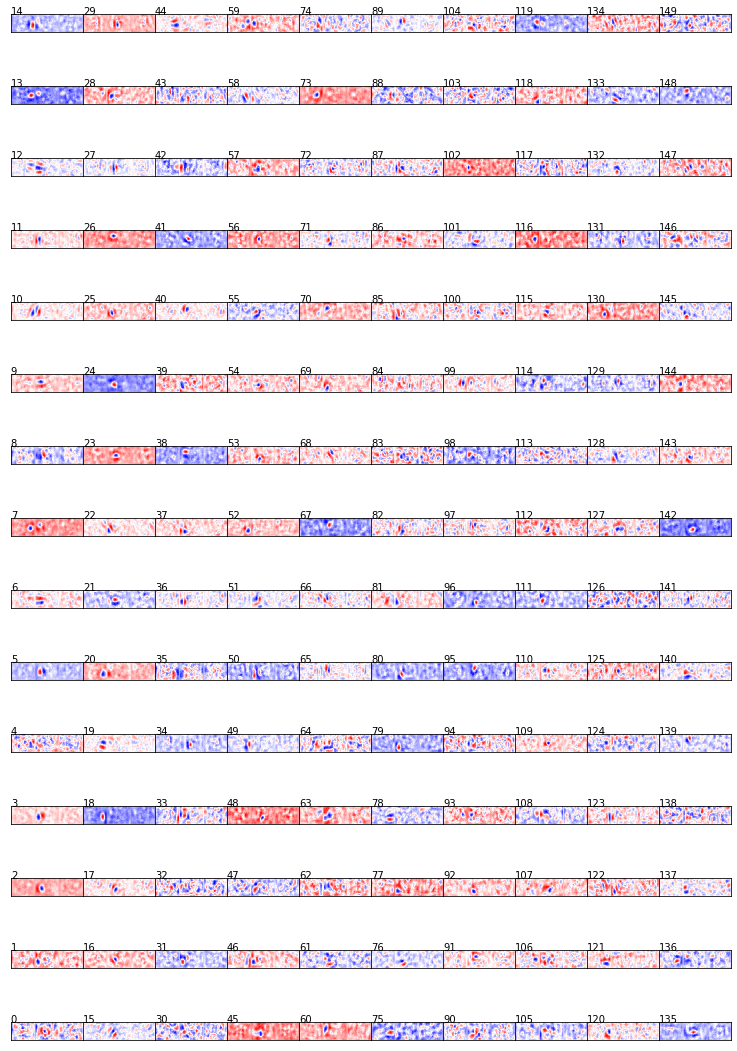

In [23]:
#Plot receptive fields
assembly_array=pipeline.fit_ridge(V)
pipeline.plot_all_receptive_fields(assembly_array)

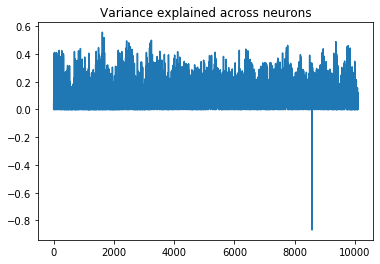

Total variance explained, averaged over neurons is: 0.09819654155640045


In [24]:
#Variance explained
pipeline.variance_explained_across_neurons(U,V)

# Ideas on what to do

You can modify the pipeline to fit other unsupervised models from sklearn for example. There are tons of unsupervised models on sklearn, such as PCA, sparsePCA, Latent Dirichlet Allocation, NMF and so forth. See some of the results from our poster https://github.com/mariakesa/EnsemblePursuit/blob/master/SAND9Poster Feel free to play around with the code and modify it as needed. 